# User’s Guide, Chapter 4: Lists, Streams (I) and Output

## Working with multiple objects via Lists

In [1]:
from music21 import *
note1 = note.Note("G3")
note2 = note.Note("B-3")
note3 = note.Note("D4")
note4 = note.Note("F#4")
note5 = note.Note("A4")
note6 = note.Note("C5")
note7 = note.Note("E5")
note8 = note.Note("G#5")
note9 = note.Note("B5")
note10 = note.Note("C#6")
note11 = note.Note("D#6")
note12 = note.Note("F6")

for thisNote in [note1, note2, note3, note4, note5, note6, note7, note8, note9, note10, note11, note12]:
    thisNote.duration.type = 'whole'
    # print(thisNote.duration)

music21: Certain music21 functions might need the optional package scipy;
                  if you run into errors, install it by following the instructions at
                  http://mit.edu/music21/doc/installing/installAdditional.html


## Introduction to Streams

### Creating simple Streams

In [4]:
sBerg = stream.Stream()

for thisNote in [note1, note2, note3, note4, note5, note6, note7, note8, note9, note10, note11, note12]:
    sBerg.append(thisNote)

In [5]:
len(sBerg)

12

In [6]:
len(sBerg.flat.getElementsByClass(note.Note))

12

In [7]:
sBerg.show('text')

{0.0} <music21.note.Note G>
{4.0} <music21.note.Note B->
{8.0} <music21.note.Note D>
{12.0} <music21.note.Note F#>
{16.0} <music21.note.Note A>
{20.0} <music21.note.Note C>
{24.0} <music21.note.Note E>
{28.0} <music21.note.Note G#>
{32.0} <music21.note.Note B>
{36.0} <music21.note.Note C#>
{40.0} <music21.note.Note D#>
{44.0} <music21.note.Note F>


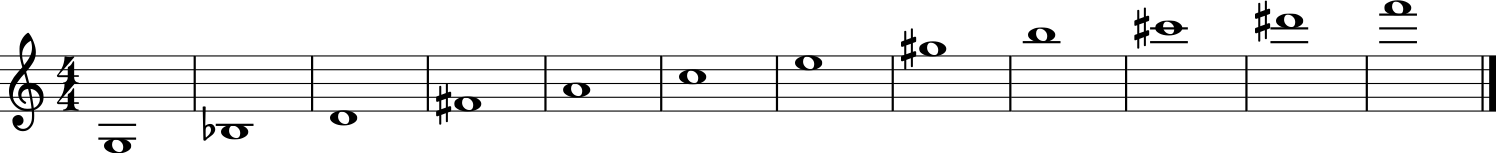

In [7]:
sBerg.show()

In [8]:
for thisNote in sBerg:
    print(thisNote.nameWithOctave)

G3
B-3
D4
F#4
A4
C5
E5
G#5
B5
C#6
D#6
F6


In [8]:
sBerg.analyze('ambitus')

<music21.interval.Interval m21>

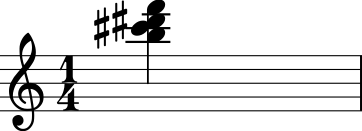

In [10]:
triad1 = chord.Chord()
triad2 = chord.Chord()
triad3 = chord.Chord()
triad4 = chord.Chord()
wtScale = chord.Chord()

for thisNote in sBerg[0:3]:
    triad1.add(thisNote)

for thisNote in sBerg[2:5]:
    triad2.add(thisNote)

for thisNote in sBerg[4:7]:
    triad3.add(thisNote)

for thisNote in sBerg[6:9]:
    triad4.add(thisNote)

for thisNote in sBerg[8:12]:
    wtScale.add(thisNote)

wtScale.show()

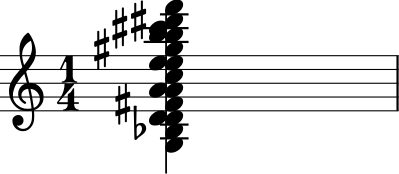

In [11]:
fullChord = chord.Chord([triad1, triad2, triad3, triad4, wtScale])

fullChord.show()

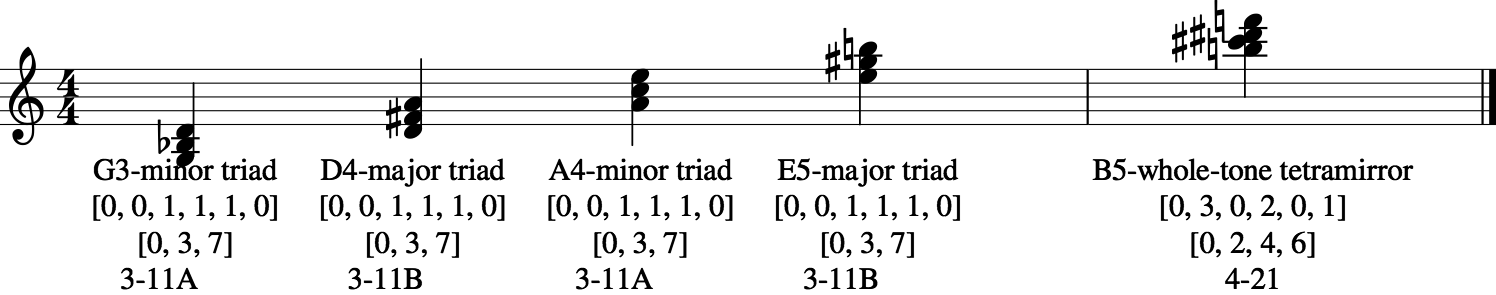

In [12]:
sChords = stream.Stream()

sChords.append(triad1);
sChords.append(triad2);
sChords.append(triad3);
sChords.append(triad4);
sChords.append(wtScale);

for thisChord in sChords:
    thisChord.addLyric(thisChord.pitchedCommonName)
    thisChord.addLyric(thisChord.intervalVector)
    thisChord.addLyric(thisChord.primeForm)
    thisChord.addLyric(thisChord.forteClass)

sChords.show()

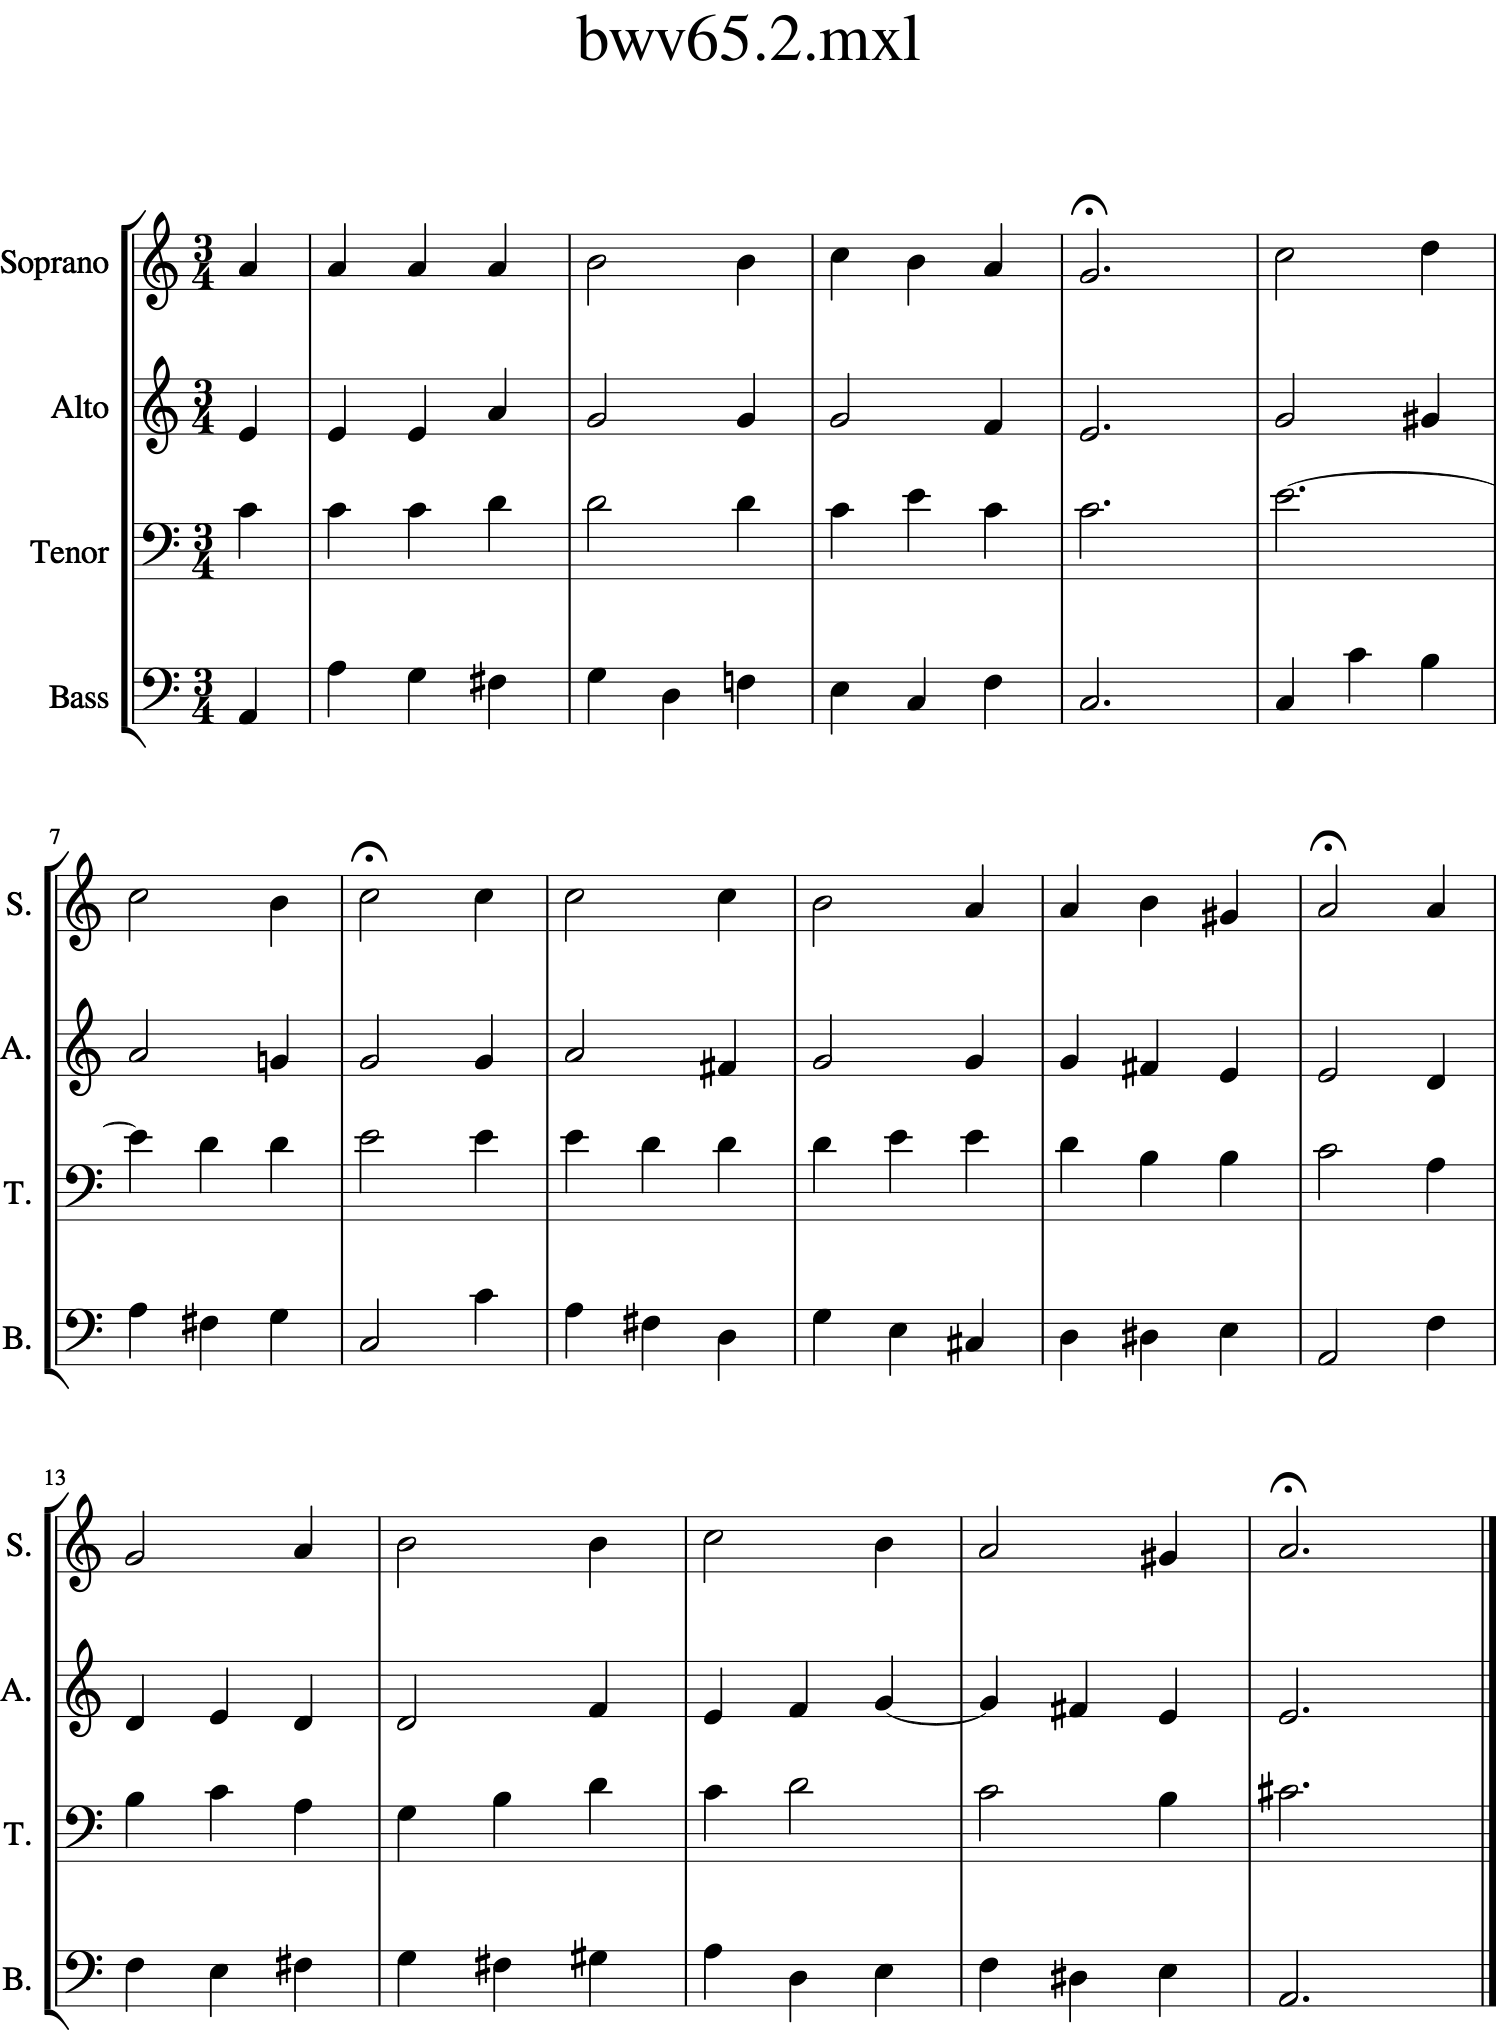

In [2]:
s = corpus.parse('bach/bwv65.2.xml')
s.show()

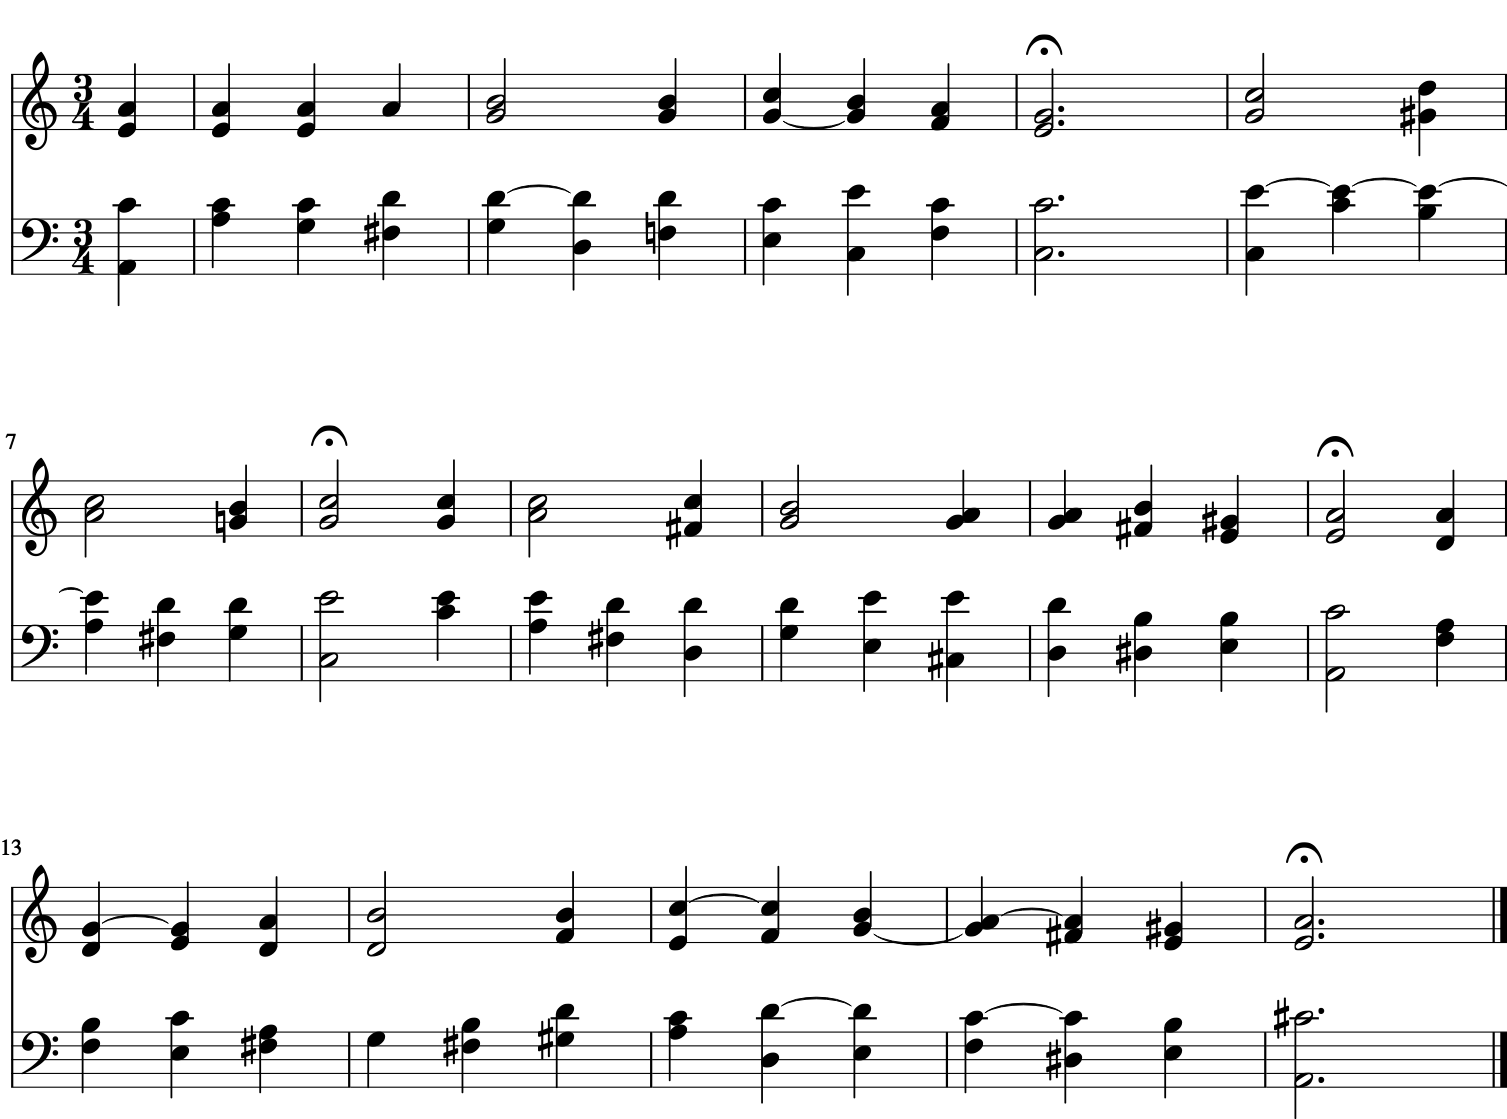

In [30]:
fVoices = stream.Score((s.parts['Soprano'], s.parts['Alto'])).chordify()
mVoices = stream.Score((s.parts['Tenor'], s.parts['Bass'])).chordify()

chorale2p = stream.Score((fVoices, mVoices))
chorale2p.show()

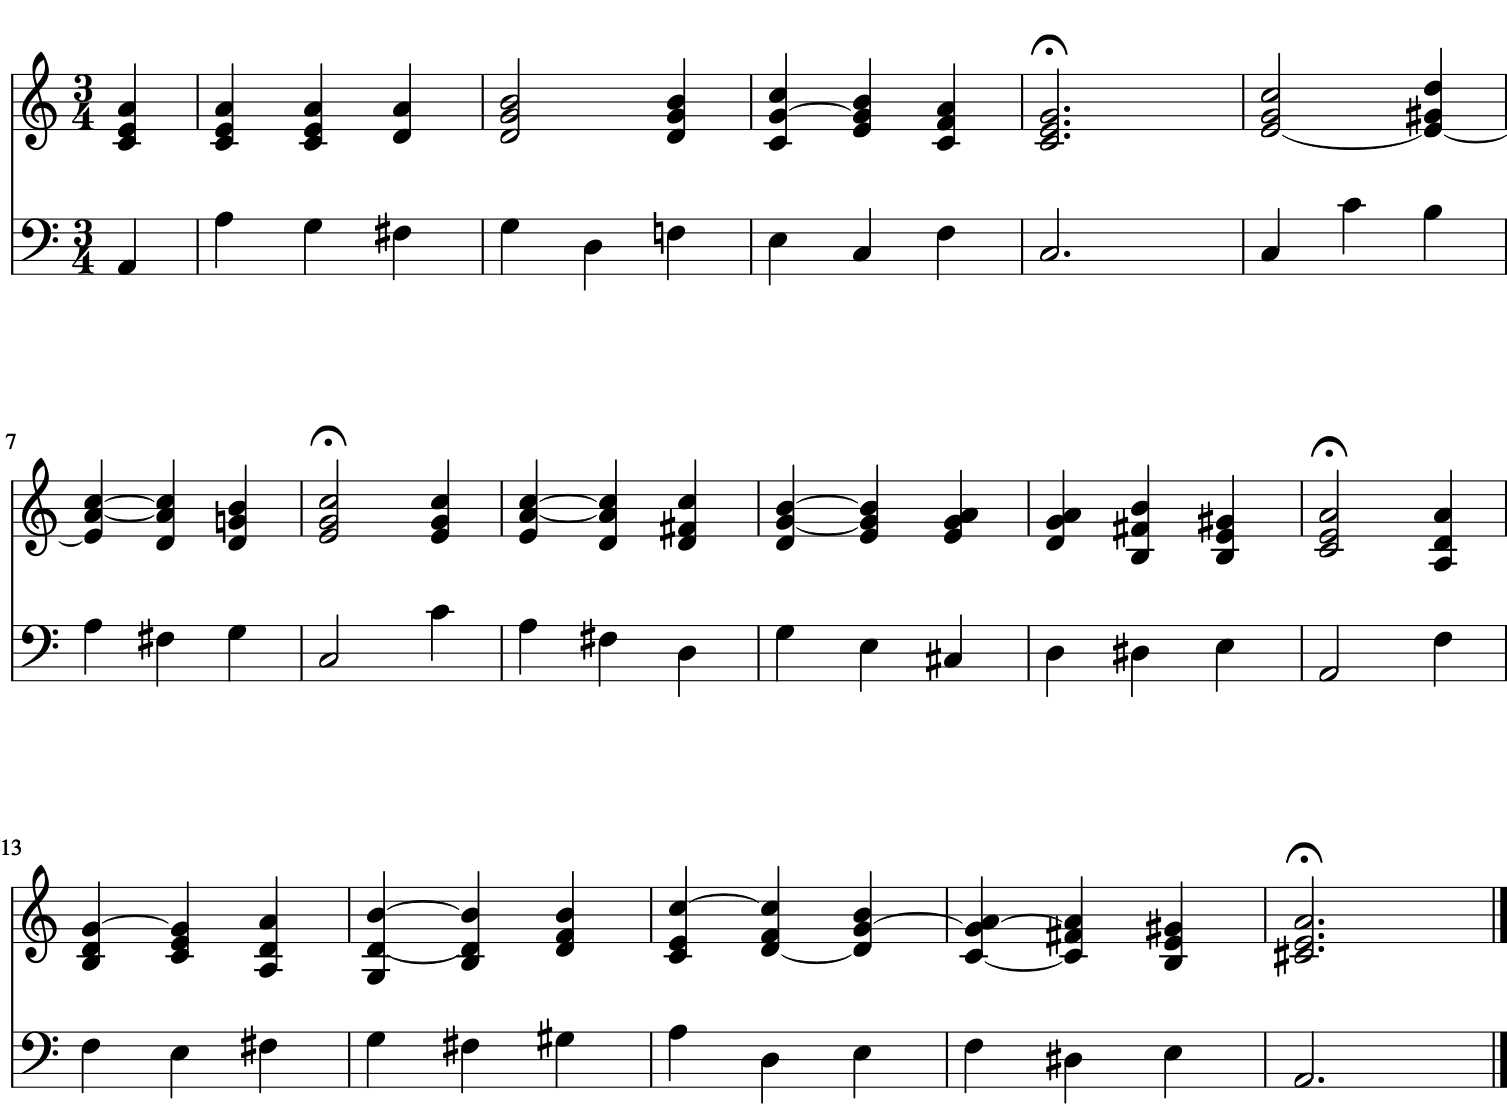

In [31]:
upperVoices = stream.Score((s.parts['Soprano'], s.parts['Alto'], s.parts['Tenor'])).chordify()
bass = stream.Score((s.parts['Bass'])).chordify()

chorale3p = stream.Score((upperVoices, bass))
chorale3p.show()


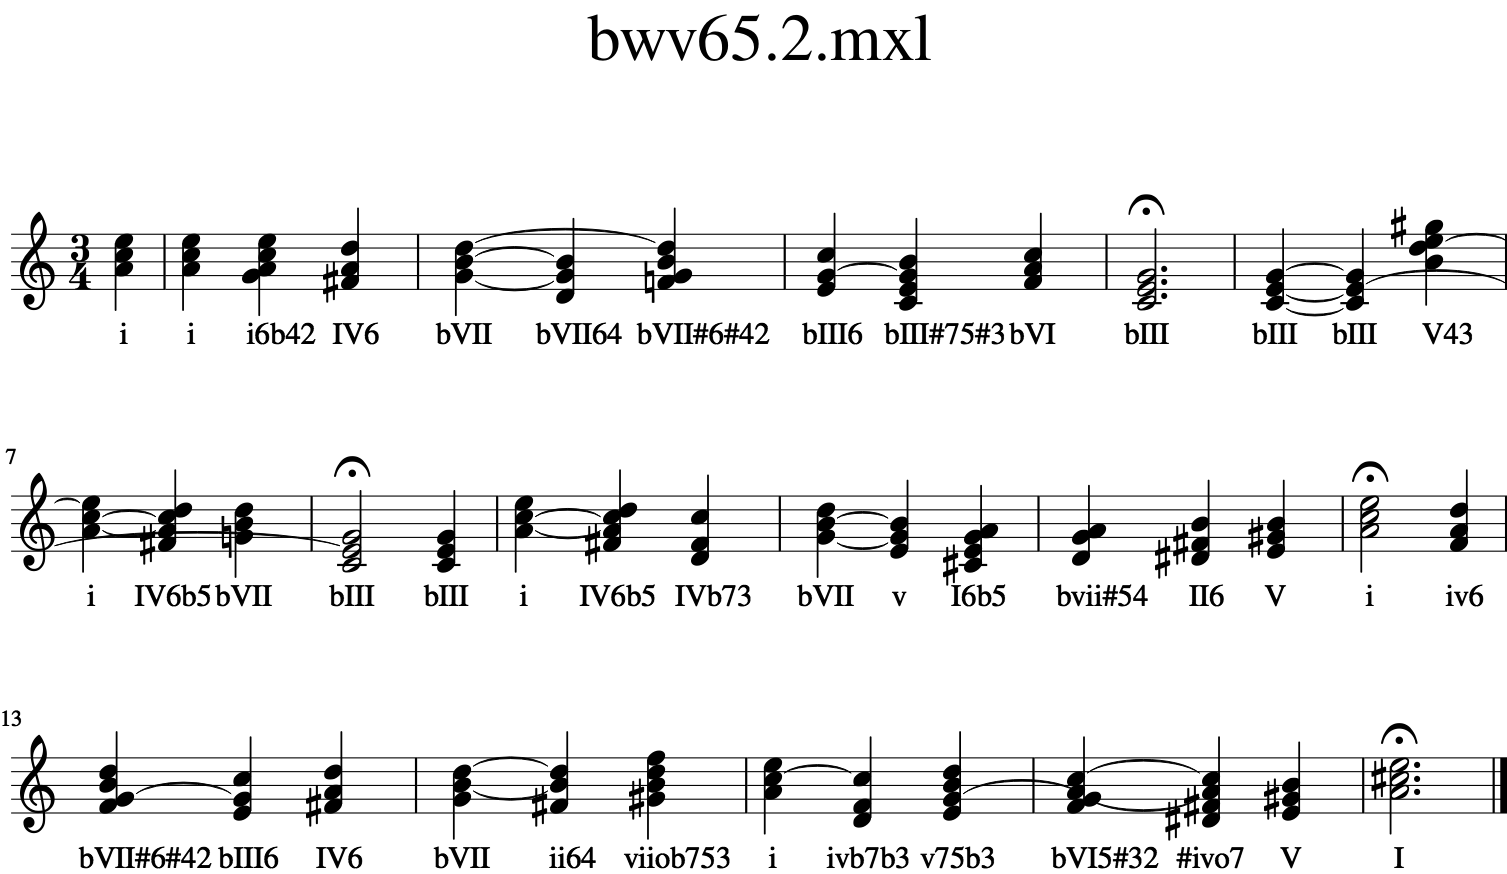

In [32]:
choraleChords = chorale3p.chordify()

for c in choraleChords.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))

choraleChords.show()

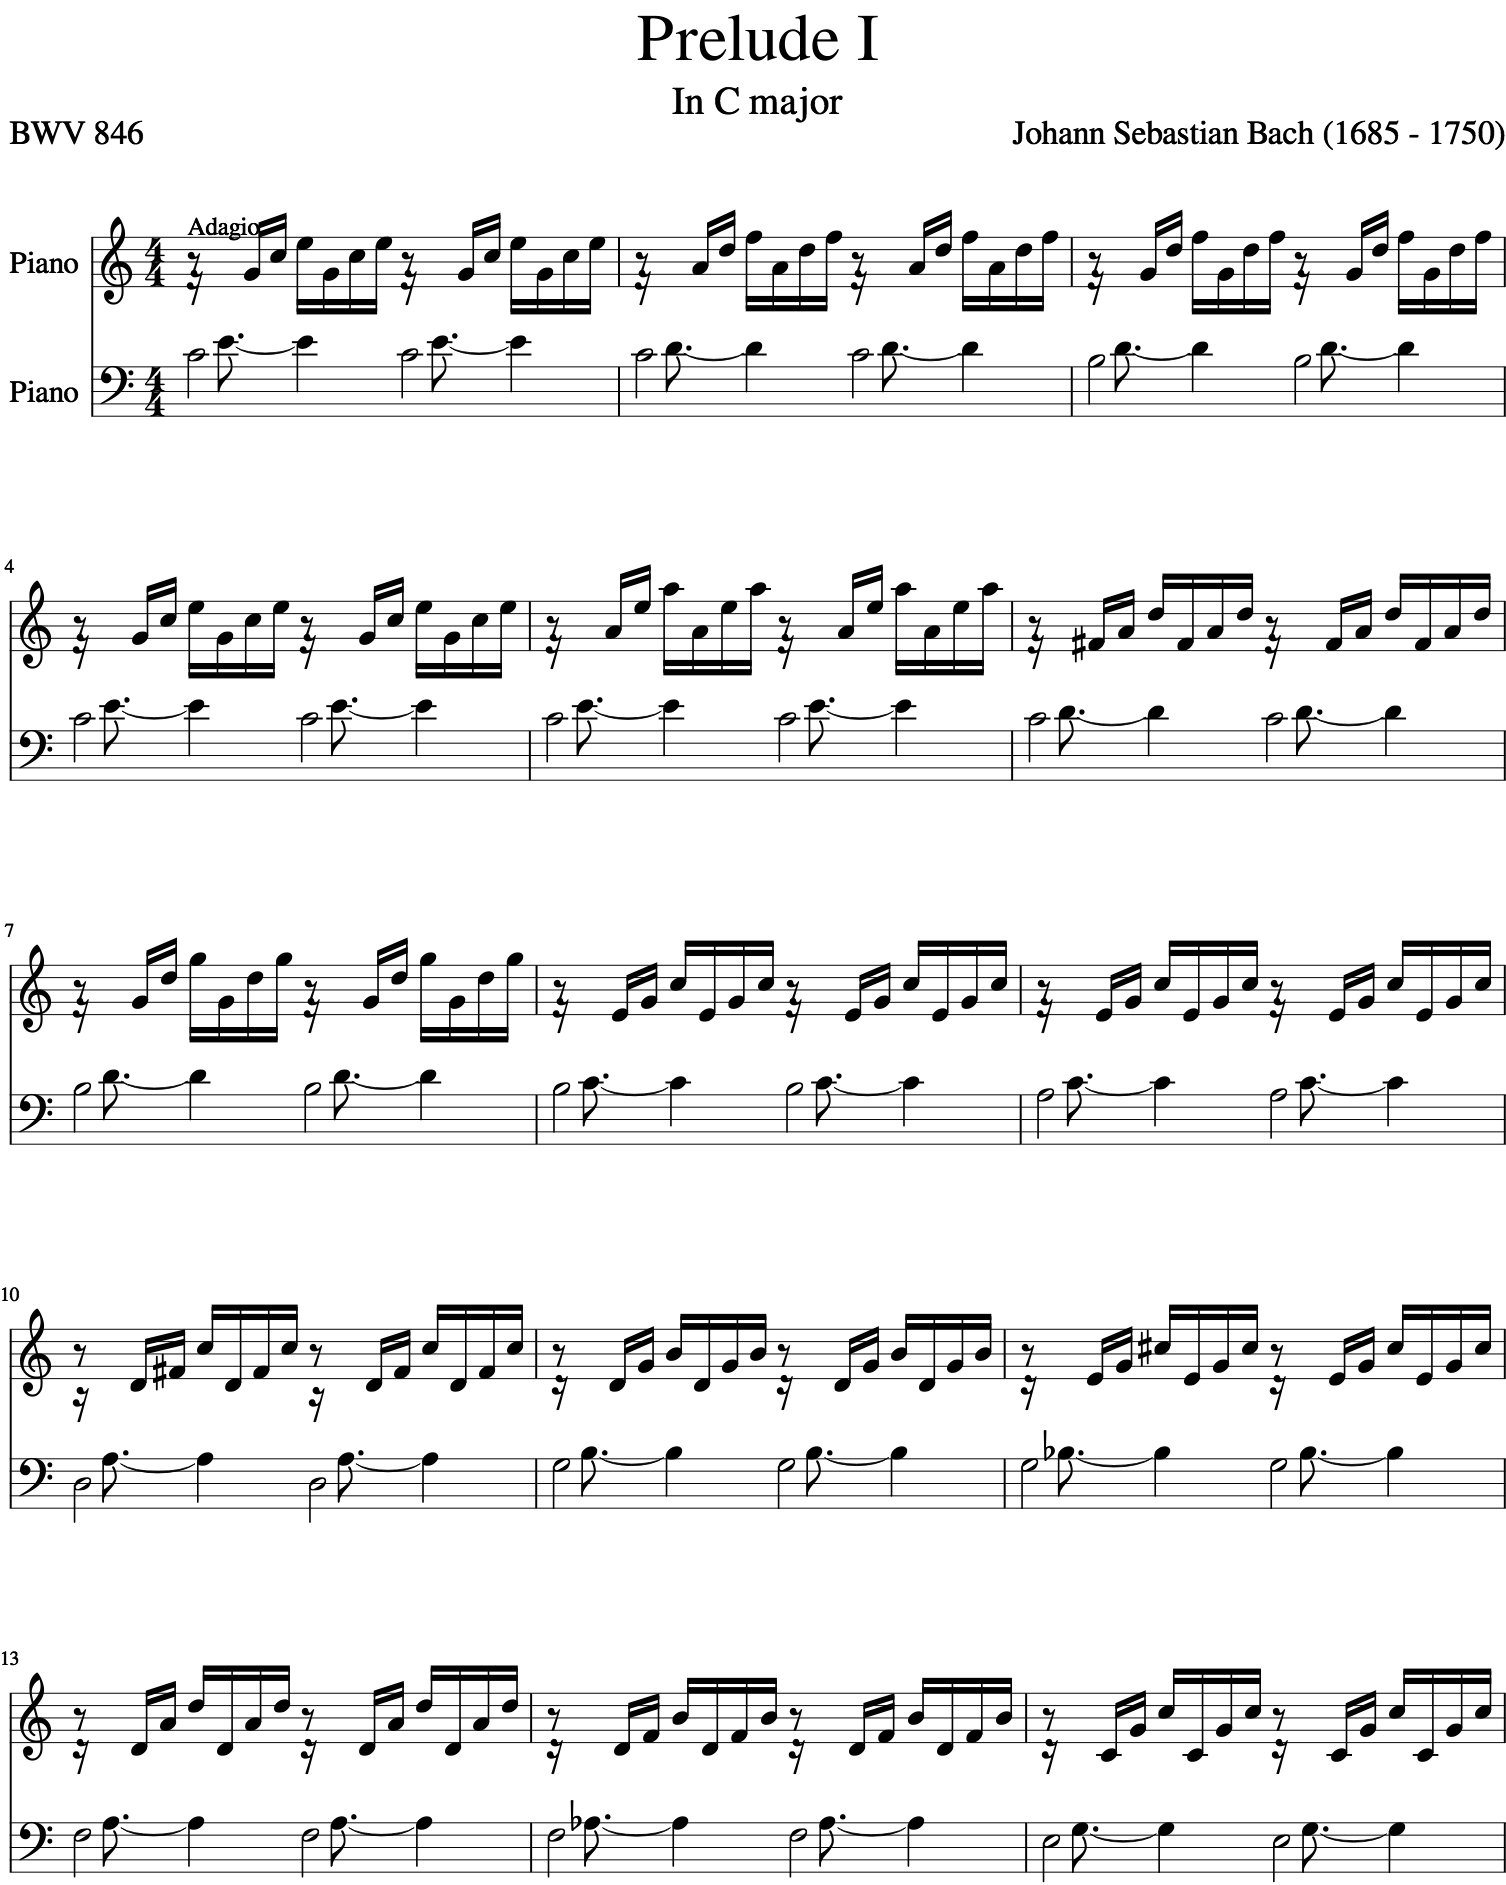

In [3]:
p = corpus.parse('bach/bwv846.xml')
p.show()

In [4]:
p.analyze('key')

<music21.key.Key of C major>

In [5]:
p.show('text')

{0.0} <music21.text.TextBox "Prelude I">
{0.0} <music21.text.TextBox "In C major">
{0.0} <music21.text.TextBox "Johann Seb...">
{0.0} <music21.text.TextBox "BWV 846">
{0.0} <music21.metadata.Metadata object at 0x1136c7fd0>
{0.0} <music21.stream.PartStaff P1-Staff1>
    {0.0} <music21.instrument.Instrument P1: Piano: Piano>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.expressions.TextExpression "Adagio">
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of C major>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Rest rest>
        {0.5} <music21.note.Note G>
        {0.75} <music21.note.Note C>
        {1.0} <music21.note.Note E>
        {1.25} <music21.note.Note G>
        {1.5} <music21.note.Note C>
        {1.75} <music21.note.Note E>
        {2.0} <music21.note.Rest rest>
        {2.5} <music21.note.Note G>
        {2.75} <music21.note.Note C>
        {3.0} <music21

In [38]:
len(p.parts)

2

In [39]:
len(p.flat.notes)

598

In [45]:
post = p.flattenParts('Note')
post.show('text')

{0.0} <music21.instrument.Instrument P1: Piano: Piano>
{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.layout.SystemLayout>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.Key of C major>
    {0.0} <music21.meter.TimeSignature 4/4>
{4.0} <music21.stream.Measure 2 offset=4.0>

{8.0} <music21.stream.Measure 3 offset=8.0>

{12.0} <music21.stream.Measure 4 offset=12.0>
    {0.0} <music21.layout.SystemLayout>
{16.0} <music21.stream.Measure 5 offset=16.0>

{20.0} <music21.stream.Measure 6 offset=20.0>

{24.0} <music21.stream.Measure 7 offset=24.0>
    {0.0} <music21.layout.SystemLayout>
{28.0} <music21.stream.Measure 8 offset=28.0>

{32.0} <music21.stream.Measure 9 offset=32.0>

{36.0} <music21.stream.Measure 10 offset=36.0>
    {0.0} <music21.layout.SystemLayout>
{40.0} <music21.stream.Measure 11 offset=40.0>

{44.0} <music21.stream.Measure 12 offset=44.0>

{48.0} <music21.stream.Measure 13 offset=48.0>
    {0.0} <music21.layout.SystemLayout>
{52.0} <music21.stream

In [7]:
mChord = chord.Chord()
#for m in p.recurse().getElementsByClass('Measure'):

for el in p.flat.notes:
    tup = (el, el.offset, el.activeSite)
    print(tup)

#for m in p.measures(1,6):    
 #   flatNotes = m.flat.notes
 #   flatNotes.show('text')
 #   for flatNote in flatNotes:
 #        mChord.add(flatNote)
 #   rem = mChord.removeRedundantPitchClasses()
 #   bChord.show('text')
    #flatChords = e.chordify()
    #bChords.app
    #print(flatNotes)
    #flatNotes.show()
    print('-----')



(<music21.note.Note C>, 0.0, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 0.25, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note G>, 0.5, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note C>, 0.75, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 1.0, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 1.0, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note G>, 1.25, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note C>, 1.5, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 1.75, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note C>, 2.0, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 2.25, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note G>, 2.5, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note C>, 2.75, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<musi

In [75]:
import 
p.plot('pianoroll')

GraphException: could not find matplotlib, graphing is not allowed